In [2]:
#load the magic
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
import datacube

sys.path.append("../Scripts")
from deafrica_datahandling import load_ard
from deafrica_plotting import rgb
from deafrica_plotting import display_map
from odc.algo import xr_geomedian

/env/lib/python3.6/site-packages/datacube/storage/masking.py:4: DeprecationWarning: datacube.storage.masking has moved to datacube.utils.masking
  category=DeprecationWarning)


In [3]:
dc = datacube.Datacube(app="geomedian_composite")

In [4]:
x = (-1.15, -1.19)
y = (5.14, 5.18)

display_map(x, y)

In [6]:
sentinel2_ds = load_ard(
    dc=dc,
    products=["s2_l2a"],
    x=x,
    y=y,
    time=("2018-02-01", "2018-03-15"),
    output_crs="EPSG:6933",
    resolution=(-10,10),
    group_by="solar_day",
    measurements=["red", "green", "blue"],
    min_gooddata=0.7)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a


KeyError: 'scl'

In [8]:
#lets try the normal dc.load
sentinel2_ds = dc.load(
    product="s2_l2a",
    x=x,
    y=y,
    time=("2018-02-01", "2018-03-15"),
    output_crs="EPSG:6933",
    resolution=(-10,10),
    group_by="solar_day",
    measurements=["red", "green", "blue"])

sentinel2_ds

<xarray.Dataset>
Dimensions:      (time: 9, x: 386, y: 509)
Coordinates:
  * time         (time) datetime64[ns] 2018-02-01T10:31:35 ... 2018-03-13T10:...
  * y            (y) float64 6.6e+05 6.599e+05 6.599e+05 ... 6.549e+05 6.549e+05
  * x            (x) float64 -1.148e+05 -1.148e+05 ... -1.11e+05 -1.11e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 1020 1036 1016 1028 ... 751 757 762 733
    green        (time, y, x) uint16 1180 1156 1168 1156 ... 1076 1082 1050 1076
    blue         (time, y, x) uint16 973 975 984 984 989 ... 1090 1062 1056 1076
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

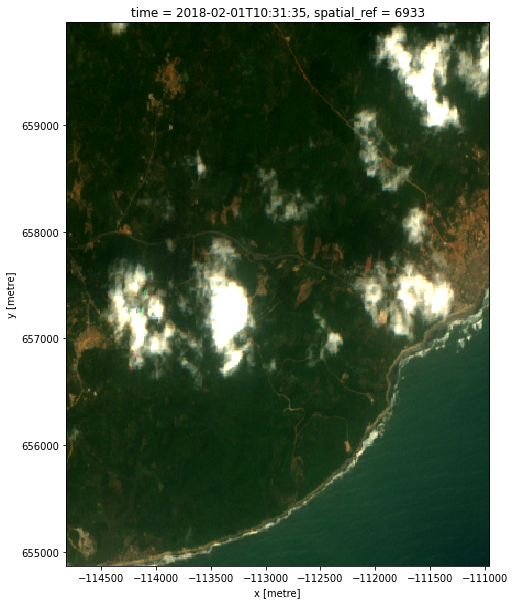

In [9]:
rgb(sentinel2_ds, bands=['red', 'green', 'blue'],
   index=0, size=10)

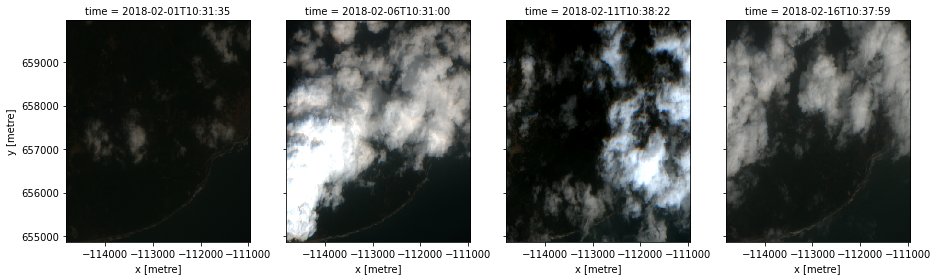

In [11]:
rgb(sentinel2_ds, bands=['red', 'green', 'blue'],
   index=[0,1,2,3], size=4)

In [13]:
#lets try with the Using_load_ard.ipynb

#This will speed up loading data
datacube.utils.rio.set_default_rio_config(aws='auto', cloud_defaults=True)

In [30]:
# Create a reusable query
query = {
    'x': x,
    'y': y,
    'time': ("2018-02-01", "2018-03-15"),
    'measurements': ['red', 'green', 'blue'],
    'output_crs' : 'epsg:6933',
    'group_by': 'solar_day'

}

In [31]:
# Load available data from both S2 datasets
sentinel2_ds = load_ard(dc=dc,
                        products=['s2a_msil2a', 's2b_msil2a'], 
                        resolution=(-10, 10),
                        min_gooddata=0.7,
                        **query)

# Print output data
print(sentinel2_ds)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2a_msil2a
    s2b_msil2a
Counting good quality pixels for each time step
Filtering to 4 out of 9 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 4 time steps
<xarray.Dataset>
Dimensions:      (time: 4, x: 386, y: 509)
Coordinates:
  * time         (time) datetime64[ns] 2018-02-01T10:31:35.020000 ... 2018-03...
  * y            (y) float64 6.6e+05 6.599e+05 6.599e+05 ... 6.549e+05 6.549e+05
    spatial_ref  int32 6933
  * x            (x) float64 -1.148e+05 -1.148e+05 ... -1.11e+05 -1.11e+05
Data variables:
    red          (time, y, x) float32 1024.0 1040.0 1021.0 ... 744.0 750.0 722.0
    green        (time, y, x) float32 1198.0 1172.0 1188.0 ... 1028.0 1054.0
    blue         (time, y, x) float32 1002.0 1005.0 1015.0 ... 1017.0 1034.0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


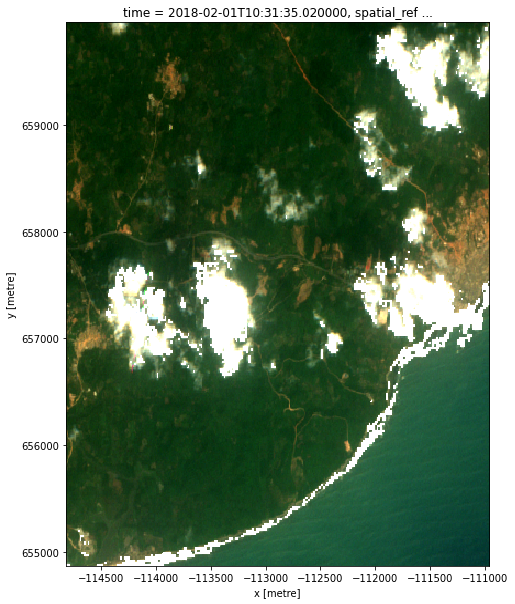

In [32]:
rgb(sentinel2_ds, bands=['red', 'green', 'blue'],
   index=0, size=10)

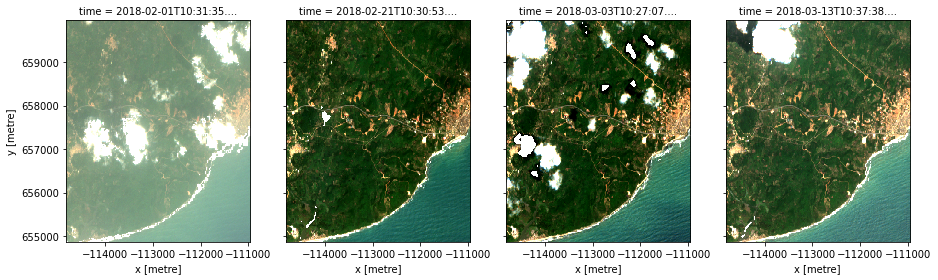

In [33]:
rgb(sentinel2_ds, bands=['red', 'green', 'blue'],
   col='time', size=4)

In [29]:
#try again with code taken from using 

# Load available data from both S2 datasets
sentinel2_ds = load_ard(dc=dc,
              products=['s2_l2a'], 
              resolution=(-20, 20),
              dask_chunks={'time':1,'x':500,'y':500},
              **query)

# Print output data
print(sentinel2_ds)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a


KeyError: 'scl'

In [34]:
geomedian_composite = xr_geomedian(sentinel2_ds)

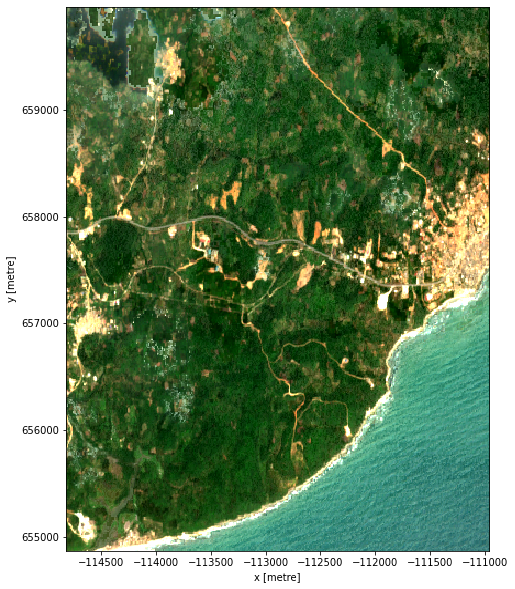

In [36]:
rgb(geomedian_composite, bands=['red', 'green', 'blue'], size=10)

In [ ]:
#Session 3 Quiz

In [43]:
# Create a reusable query
q1 = {
    'x': (30.27, 30.31),
    'y': (-19.01, -19.05),
    'time': ('2017-11-01', '2018-01-31'),
    'measurements': ['red', 'green', 'blue'],
    'output_crs' : 'epsg:6933',
    'group_by': 'solar_day'
}

q2 = {
    'x': (30.27, 30.31),
    'y': (-19.01, -19.05),
    'time': ('2019-06-01', '2019-08-31'),
    'measurements': ['red', 'green', 'blue'],
    'output_crs' : 'epsg:6933',
    'group_by': 'solar_day'
}

In [44]:
# Load available data from both S2 datasets
ds_1 = load_ard(dc=dc,
                products=['s2a_msil2a', 's2b_msil2a'],
                #products=['s2_l2a'],
                resolution=(-10, 10),
                min_gooddata=0.7,
                **q1)

# Print output data
print(ds_1)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2a_msil2a
    s2b_msil2a


ValueError: No data available for query: ensure that the products specified have data for the time and location requested

In [46]:
# Load available data from both S2 datasets
ds_2 = load_ard(dc=dc,
                #products=['s2a_msil2a', 's2b_msil2a'],
                products=['s2_l2a'],
                resolution=(-10, 10),
                min_gooddata=0.7,
                **q2)

# Print output data
print(ds_2)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a


KeyError: 'scl'